## Pandas使用explode实现一行变多行统计

解决实际问题：一个字段包含多个值，怎样将这个值拆分成多行，然后实现统计

比如：一个电影有多个分类、一个人有多个喜好，需要按分类、喜好做统计

### 1、读取数据

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "./datas/movielens-1m/movies.dat",
    header=None,
    names="MovieID::Title::Genres".split("::"),
    sep="::",
    engine="python"
)

In [3]:
df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


***问题：怎样实现这样的统计，每个题材有多少部电影？***

解决思路：
* 将Genres按照分隔符|拆分
* 按Genres拆分成多行
* 统计每个Genres下的电影数目

### 2、将Genres字段拆分成列表

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
# 当前的Genres字段是字符串类型
type(df.iloc[0]["Genres"])

str

In [6]:
# 新增一列
df["Genre"] = df["Genres"].map(lambda x:x.split("|"))

In [7]:
df.head()

,MovieID,Title,Genres,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [8]:
# Genre的类型是列表
print(df["Genre"][0])
print(type(df["Genre"][0]))

['Animation', "Children's", 'Comedy']
<class 'list'>


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
Genre      3883 non-null object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


### 3、使用explode将一行拆分成多行

语法：pandas.DataFrame.explode(column)  
将dataframe的一个list-like的元素按行复制，index索引随之复制

In [10]:
df_new = df.explode("Genre")

In [11]:
df_new.head(10)

,MovieID,Title,Genres,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,Drama


### 4、实现拆分后的题材的统计

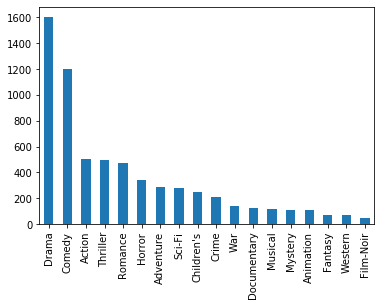

In [12]:
%matplotlib inline
df_new["Genre"].value_counts().plot.bar()